In [1]:
import pandas as pd
import numpy as np
import jieba.analyse

In [2]:
stopwords = []
with open('stopwords.txt', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopwords.append(data)
        
with open('userdict.txt', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        jieba.add_word(data)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 0.467 seconds.
Prefix dict has been built successfully.


In [3]:
df_terms = pd.read_csv('ba2.csv')

In [4]:
df_terms.head()

,Unnamed: 0,title
0,0,[情報] 獵鷹愛德華離隊
1,1,[情報] 漢來美食海神首勝同慶禮 下載APP領優惠
2,2,[新聞] SBL、WSBL首度合併舉行 熱身賽12/27登場
3,3,[閒聊] 如果有出實體遊戲？
4,4,"[新聞] 免費仔快看！SBL,WSBL 12月台北辦熱身賽"


In [5]:
error_lst = []
terms=[]
for i in range(len(df_terms['title'])):
    try:
        for j in list(jieba.cut(df_terms['title'][i], cut_all = False)):
            if j not in stopwords:
                terms.append(j)
    except:
        error_lst.append([i, df_terms['title'][i]])

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import jieba
import codecs
import jieba.posseg as pseg

In [7]:
a = {}          
relationships = {}  
b = []  
for i in range(len(df_terms['title'])):
    try:
        poss = jieba.cut(df_terms['title'][i], cut_all = False)
        b.append([])
        for w in poss:
            if w not in stopwords:
                b[-1].append(w)        
            if a.get(w) is None and w not in stopwords:
                relationships[w] = {}            
    except:
        pass

In [8]:
term_dic = dict()
for sentence in b:
    for term in sentence:
        if term not in term_dic:
            term_dic[term] = {}

In [9]:
for i in range(len(b)):
    for term1 in term_dic:
        num = 0
        for term2 in b[i]:
            if term1 == term2:
                num += 1
        term_dic[term1][df_terms['title'][i]] = num

In [10]:
matrix = pd.DataFrame.from_dict(term_dic)
matrix.head()

,情報,,獵鷹,愛德華,離隊,漢來,美食,海神,首勝,同慶禮,...,市,民航,線,憑,市民,引熱潮,陳將双,更想,翻漲,最新
[情報] 獵鷹愛德華離隊,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[情報] 漢來美食海神首勝同慶禮 下載APP領優惠,1,2,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
[新聞] SBL、WSBL首度合併舉行 熱身賽12/27登場,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[閒聊] 如果有出實體遊戲？,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"[新聞] 免費仔快看！SBL,WSBL 12月台北辦熱身賽",0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
a = {}          
relationships = {}  
b = []     

for i in range(len(df_terms['title'])):
    try:
        poss = jieba.cut(df_terms['title'][i], cut_all = False)
        b.append([])
        for w in poss:
            if w not in stopwords:
                b[-1].append(w)        
            if a.get(w) is None and w not in stopwords:
                a[w] = 0
                relationships[w] = {}
                a[w] += 1   
    except:
        pass

for line in b:                  
    for name1 in line:                  
        for name2 in line:             
            if name1 == name2:
                continue
            if relationships[name1].get(name2) is None:     
                relationships[name1][name2]= 1
            else:
                relationships[name1][name2] = relationships[name1][name2]+ 1       
co_occur_by_records = [[name, v, w] for name, edges in relationships.items() for v, w in edges.items() if w > 25]

In [12]:
import numpy as np
np.random.shuffle(co_occur_by_records)
temp_matrix = pd.DataFrame()
for i in co_occur_by_records:
    temp_matrix.at[i[0], i[1]] = i[2]
co_occurrence_matrix_by_records = pd.DataFrame()
for i in temp_matrix:
    for j in temp_matrix:
        co_occurrence_matrix_by_records.at[i, j] = temp_matrix.at[i, j]
co_occurrence_matrix_by_records.head()

,魔獸,,海神,雲豹,例行,中信,閒聊,討論,T1,vs,...,誰,臺,攻城獅,台,專欄,Live,問題,台籃,主場,國王
魔獸,NaN,410.0,NaN,42.0,NaN,NaN,69.0,66.0,35.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
,410.0,NaN,35.0,245.0,26.0,35.0,332.0,313.0,184.0,44.0,...,37.0,32.0,34.0,59.0,29.0,60.0,76.0,27.0,52.0,35.0
海神,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
雲豹,42.0,245.0,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
例行,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
count_by_records = [i[2] for i in co_occur_by_records]
co_occur_by_records_sig = []
for i in co_occur_by_records:
    co_occur_by_records_sig.append([i[0], i[1], sigmoid((i[2] - np.mean(count_by_records))/np.std(count_by_records))])

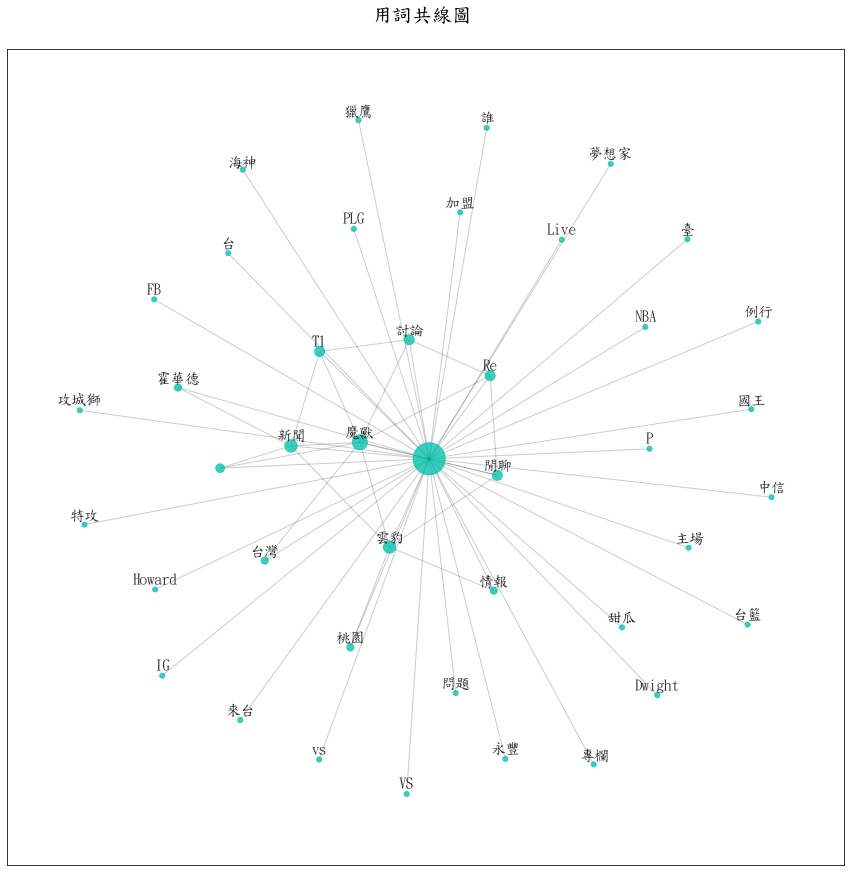

In [14]:
import matplotlib
import networkx as nx
plt.figure(figsize=(15,15))
plt.rcParams['font.sans-serif'] = ['DFKai-SB']   
g = nx.Graph()
g.add_weighted_edges_from(co_occur_by_records_sig)
pos=nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, alpha=0.8,node_size=[val*25 for (node, val) in g.degree()], node_color='#08c5b1')
nx.draw_networkx_edges(g, pos, alpha=0.2)
for p in pos:  
    pos[p][1] = pos[p][1] + 0.03
nx.draw_networkx_labels(g, pos, font_size = 15, font_family='sans-serif', alpha=0.8)
plt.suptitle('用詞共線圖',x = 0.51,y=0.92, fontsize=20)
plt.show()
